
This Project Done by Serius Team
 * Ahmed Sameh Ahmed Abdelaziz
 * Ibrahim Awny Abdelshahid Attia
 * Anas Mohamed Mahmoud Eladly
 * Ahmed Nader Khafagy
 * Basma Mohamed Talaat
 * Shams Magdy Mahmoud
 * Dana Ahmed Fikry Abdelfatah
 * Rawan Mohamed Abdelrahman





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [ ]:
df = pd.read_csv('DailyDelhiClimateTrain.csv')  ## read all data from 2013 to 2016
df.date = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.index = df['date']
df = df.drop('date', axis = 1)
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,25.506127,60.744851,6.806865,1011.101197
std,7.339416,16.743928,4.559688,180.293335
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.571429
50%,27.714286,62.625000,6.250000,1008.555556
75%,31.312500,72.125000,9.250000,1014.937500
max,38.714286,98.000000,42.220000,7679.333333


In [ ]:
attributs = df.columns.values
names = ['Mean Temperature','Humidity', 'Wind Speed', 'Mean Pressure']
attributs


array(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype=object)

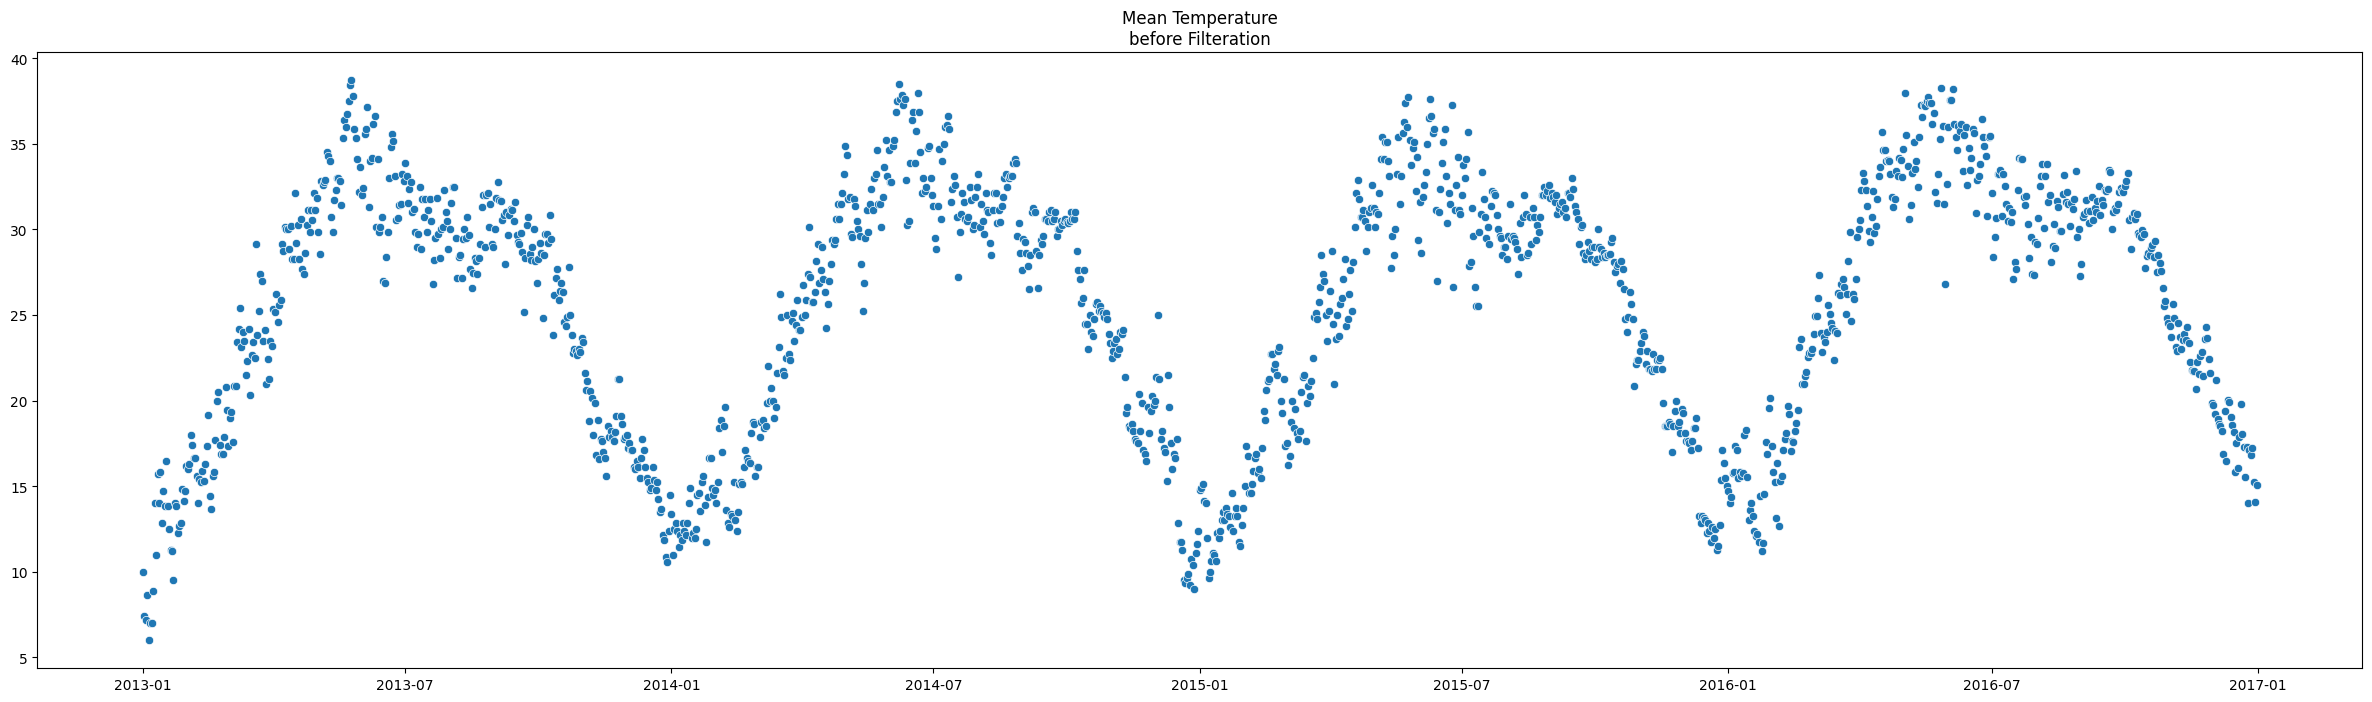

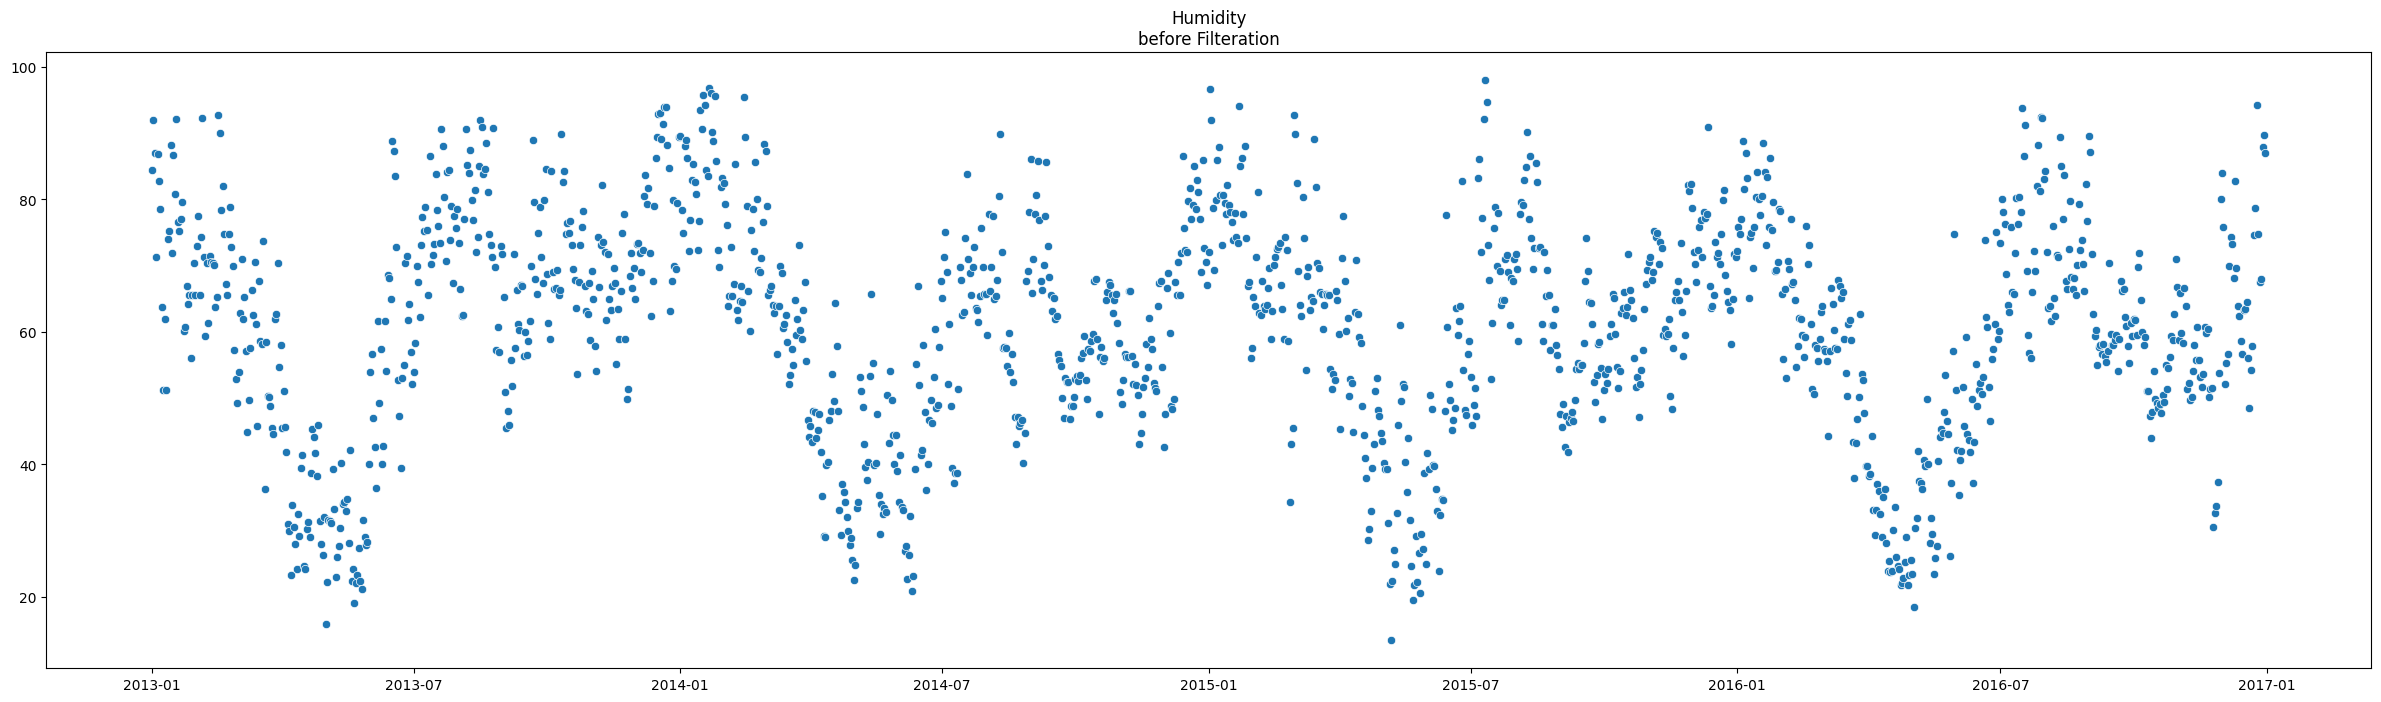

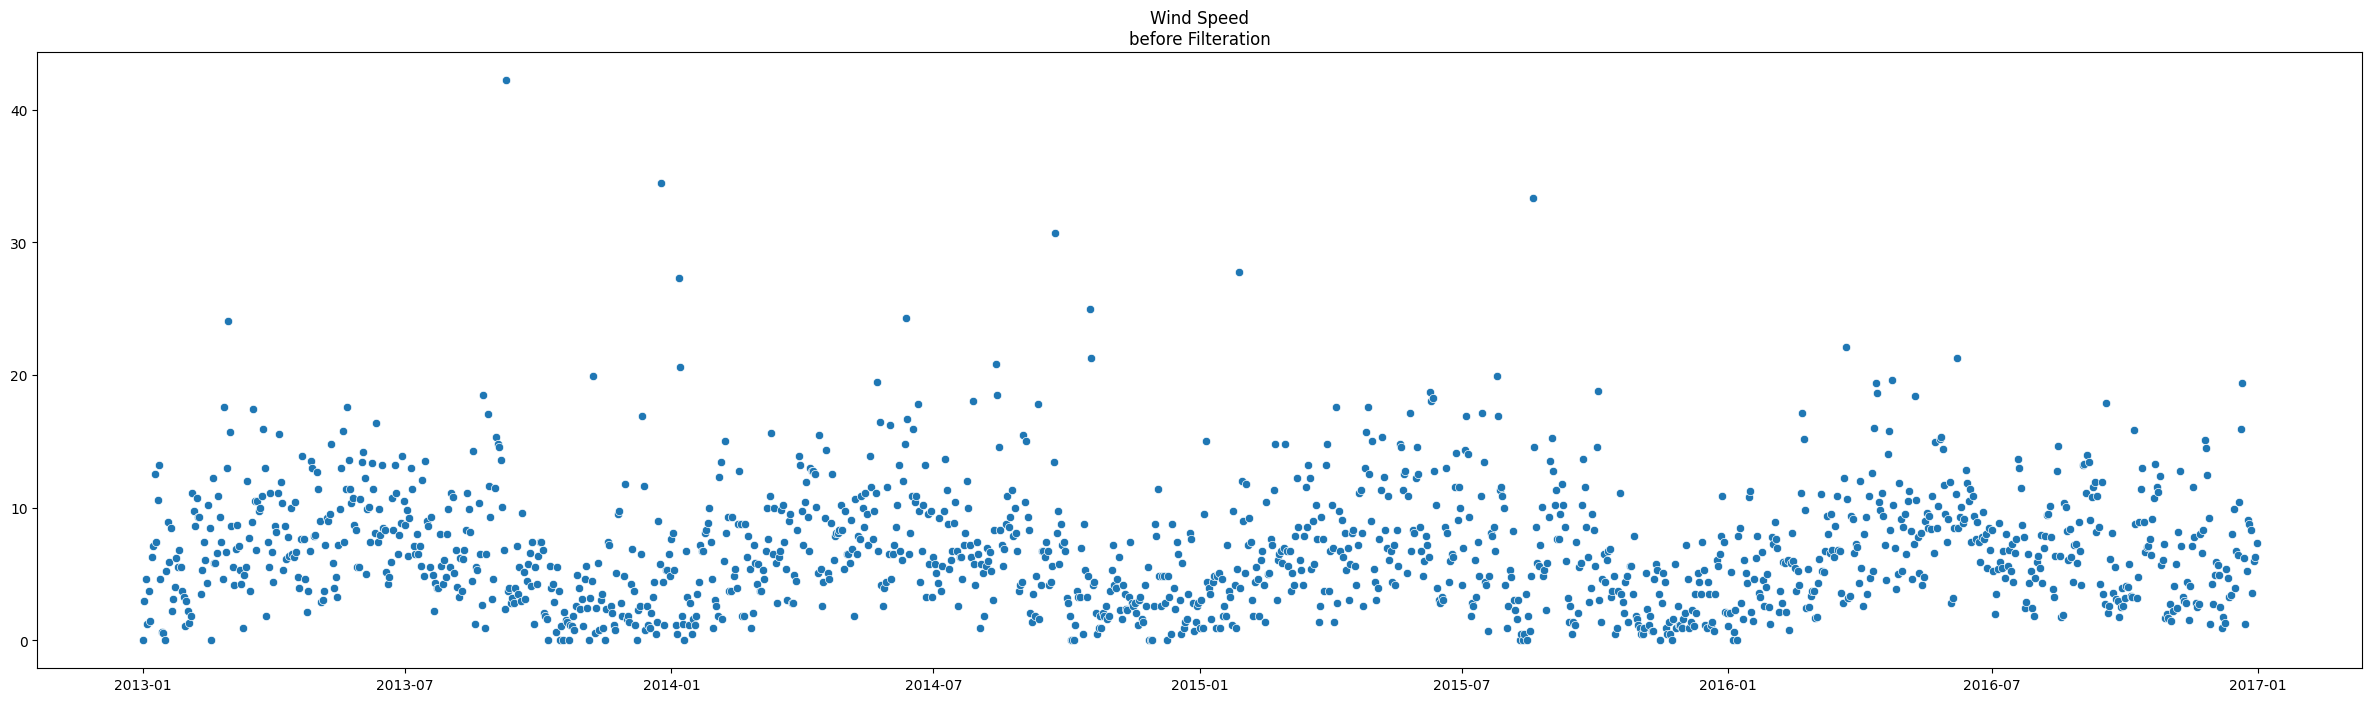

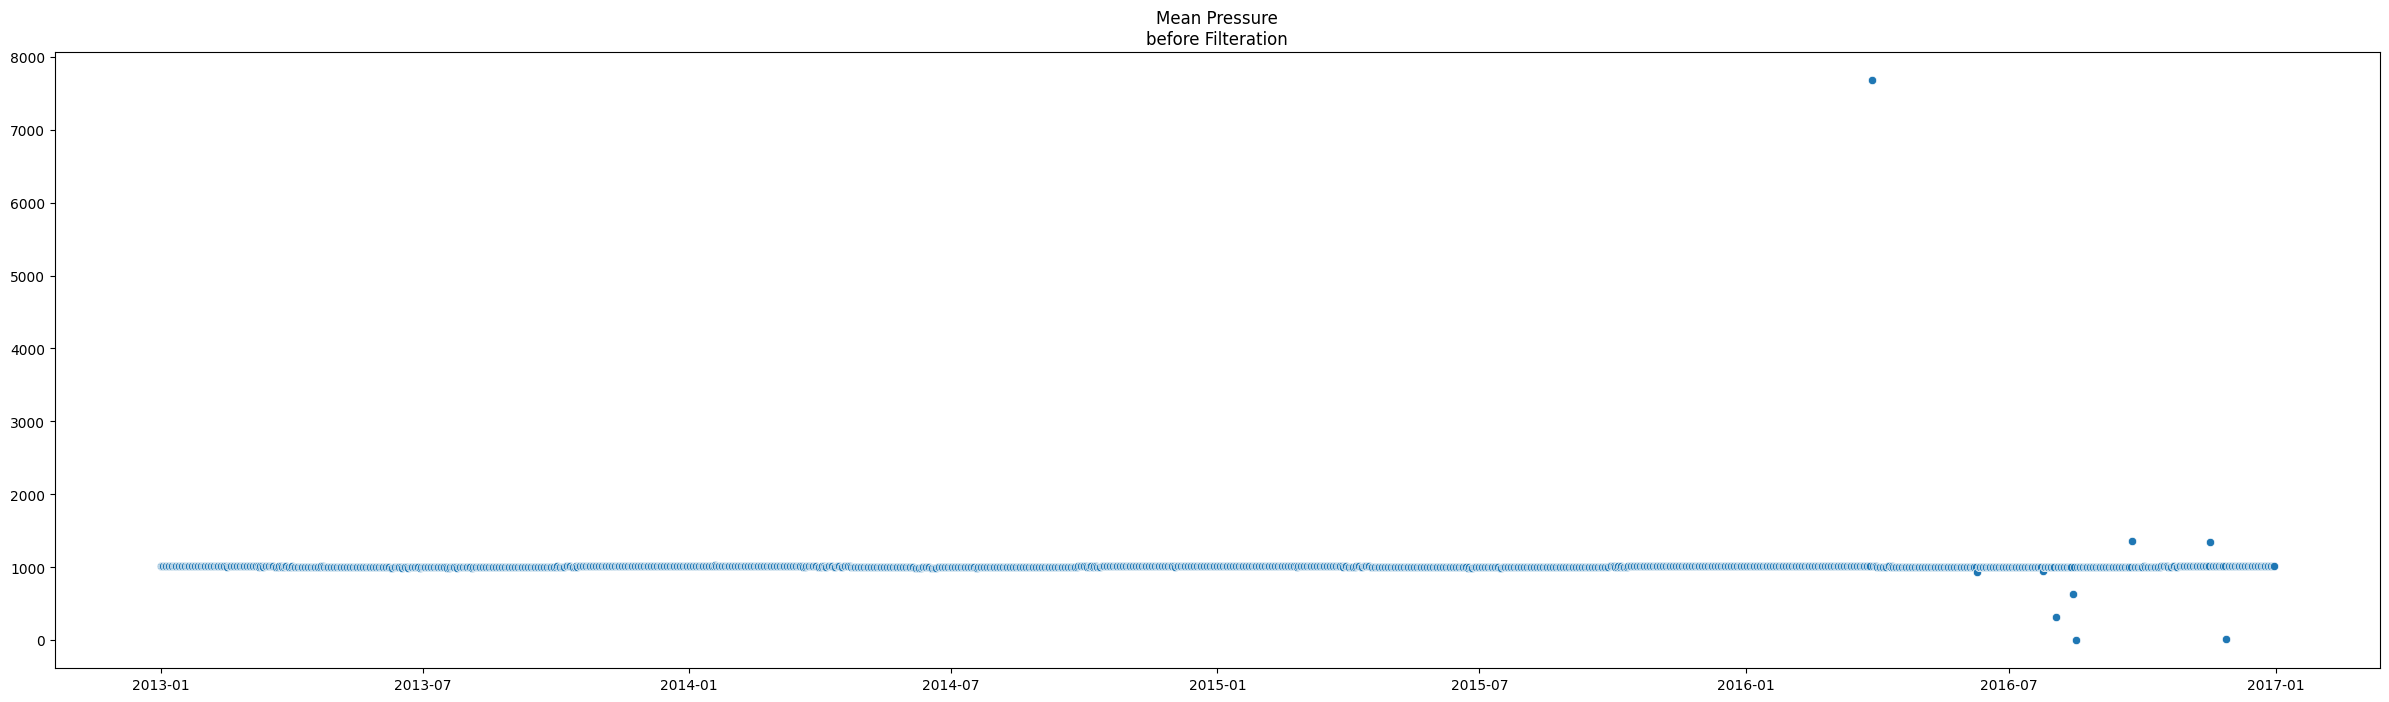

In [ ]:
def showAllTimeSeries(df,filter):
    for atr,name in zip(attributs, names):
        plt.figure(figsize=(30,8))
        sb.scatterplot(x= df.index, y = df[atr])
        plt.title(name + '\nbefore Filteration') if filter else plt.title(name + '\nafter Filteration')
        plt.ylabel('')
        plt.xlabel('')
        plt.show()

showAllTimeSeries(df,1)

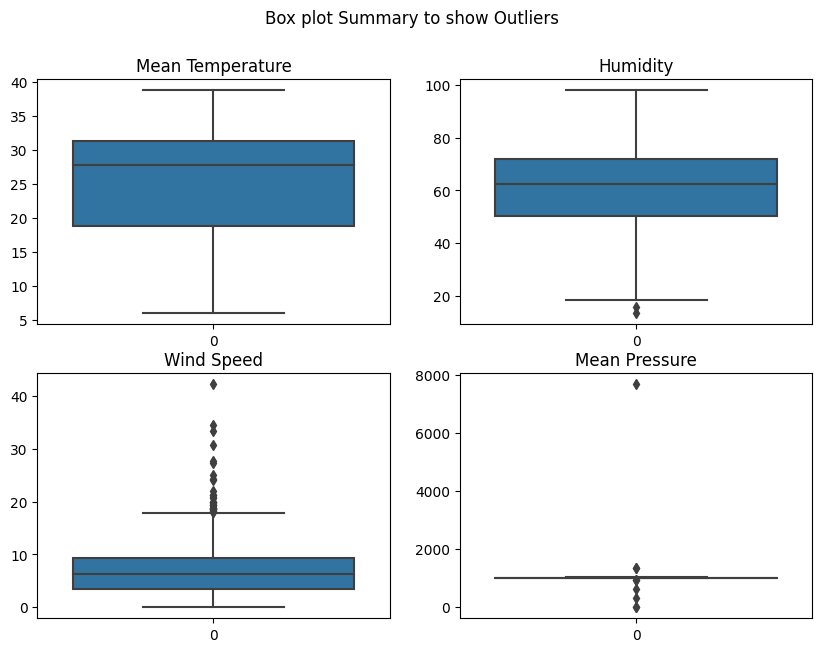

In [ ]:
def showALlBoxPlot(df, msg):
    fig, axs = plt.subplots(2,2, figsize=(10,7))
    fig.suptitle(msg)
    fig.subplots_adjust(wspace=.2, hspace=.2)

    idx = 0
    for atr, ax in zip(attributs, axs.ravel()):
        sb.boxplot(data = df[atr], ax=ax)
        ax.set_title(names[idx])
        idx+=1



showALlBoxPlot(df, "Box plot Summary to show Outliers")


In [ ]:
for atr in attributs:
    q1 = np.quantile(df[atr], .25)  # fisrt quantile
    q3 = np.quantile(df[atr], .75)  # third quantile

    iqr = np.abs(q3-q1)             # inter qurtile range
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr

    df = df[(df[atr] >= lower_bound) & (df[atr] <= upper_bound)]

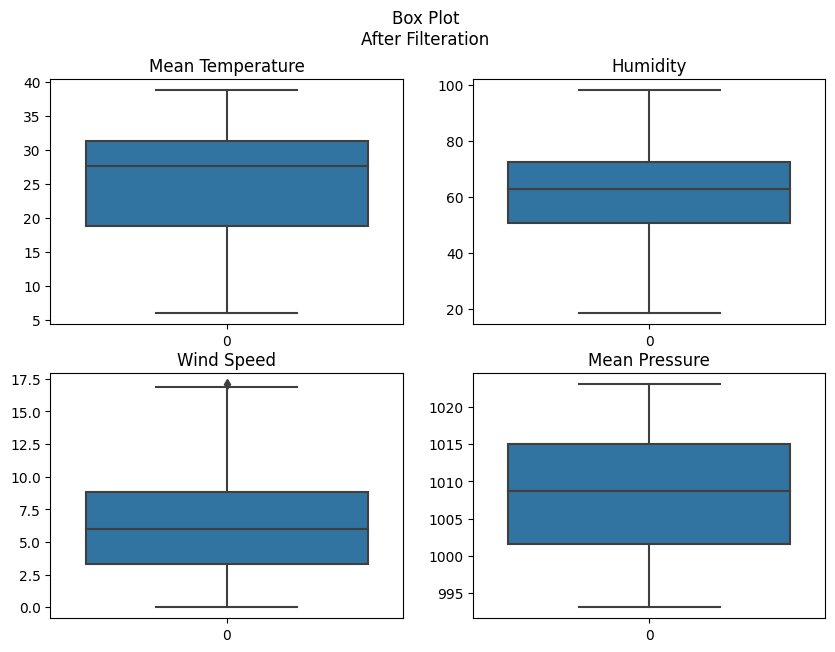

In [ ]:
showALlBoxPlot(df, "Box Plot\nAfter Filteration",)

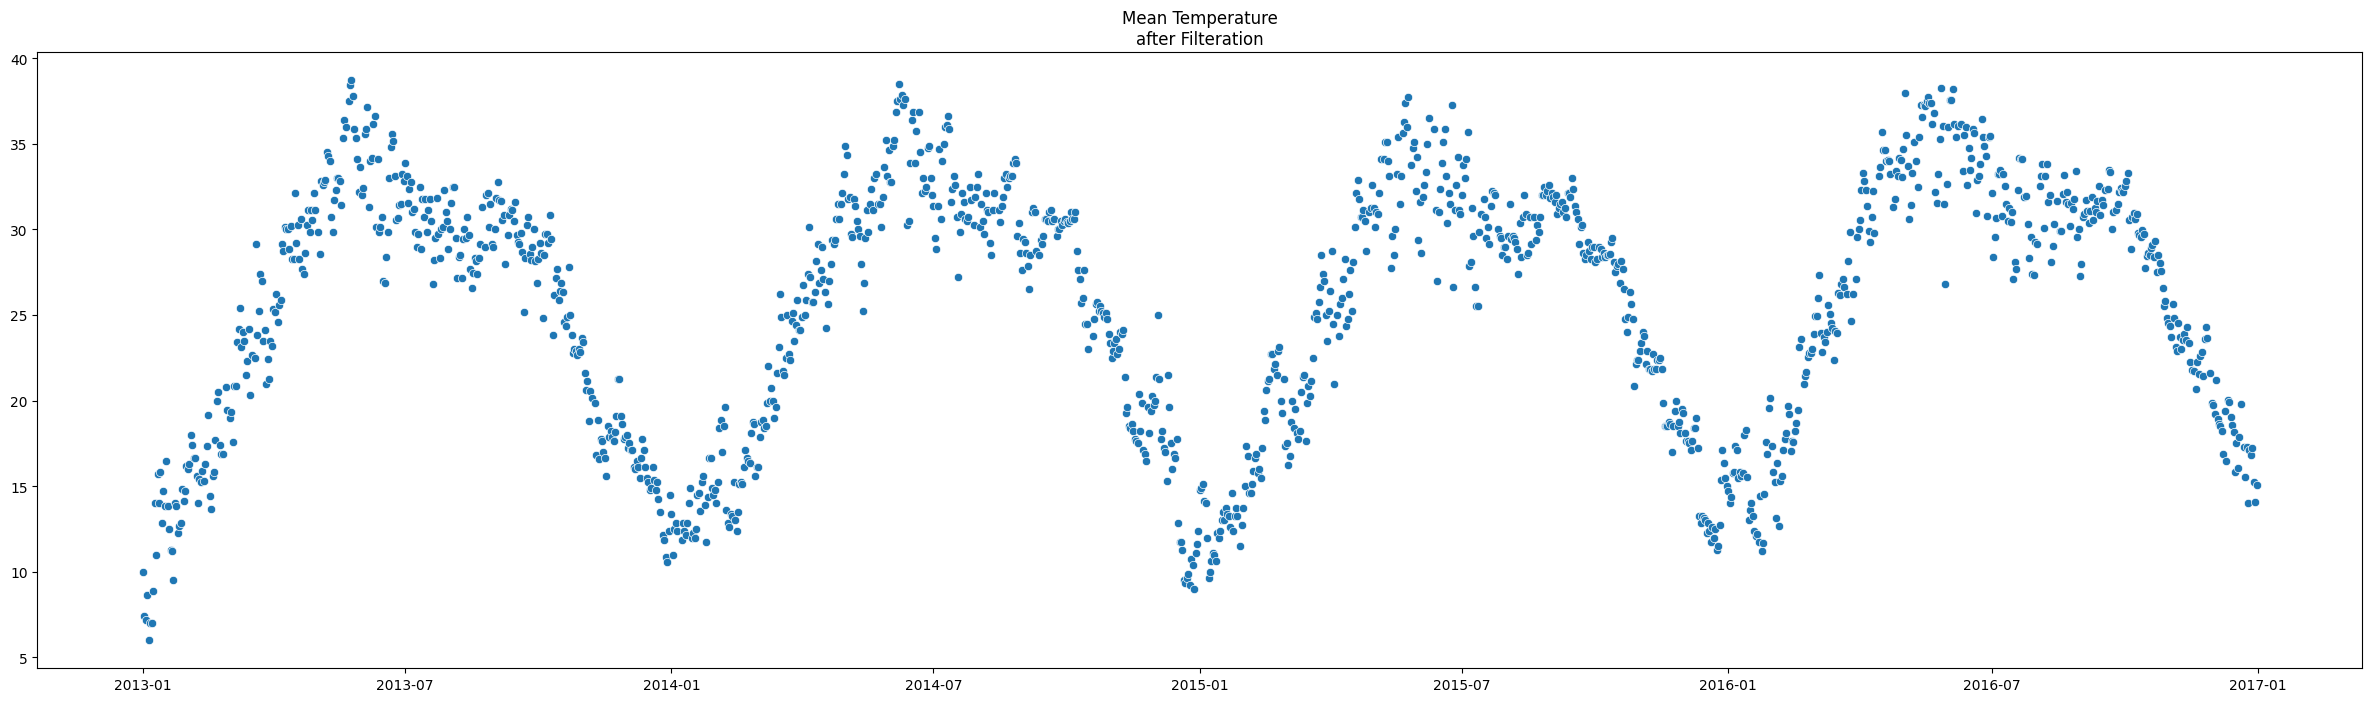

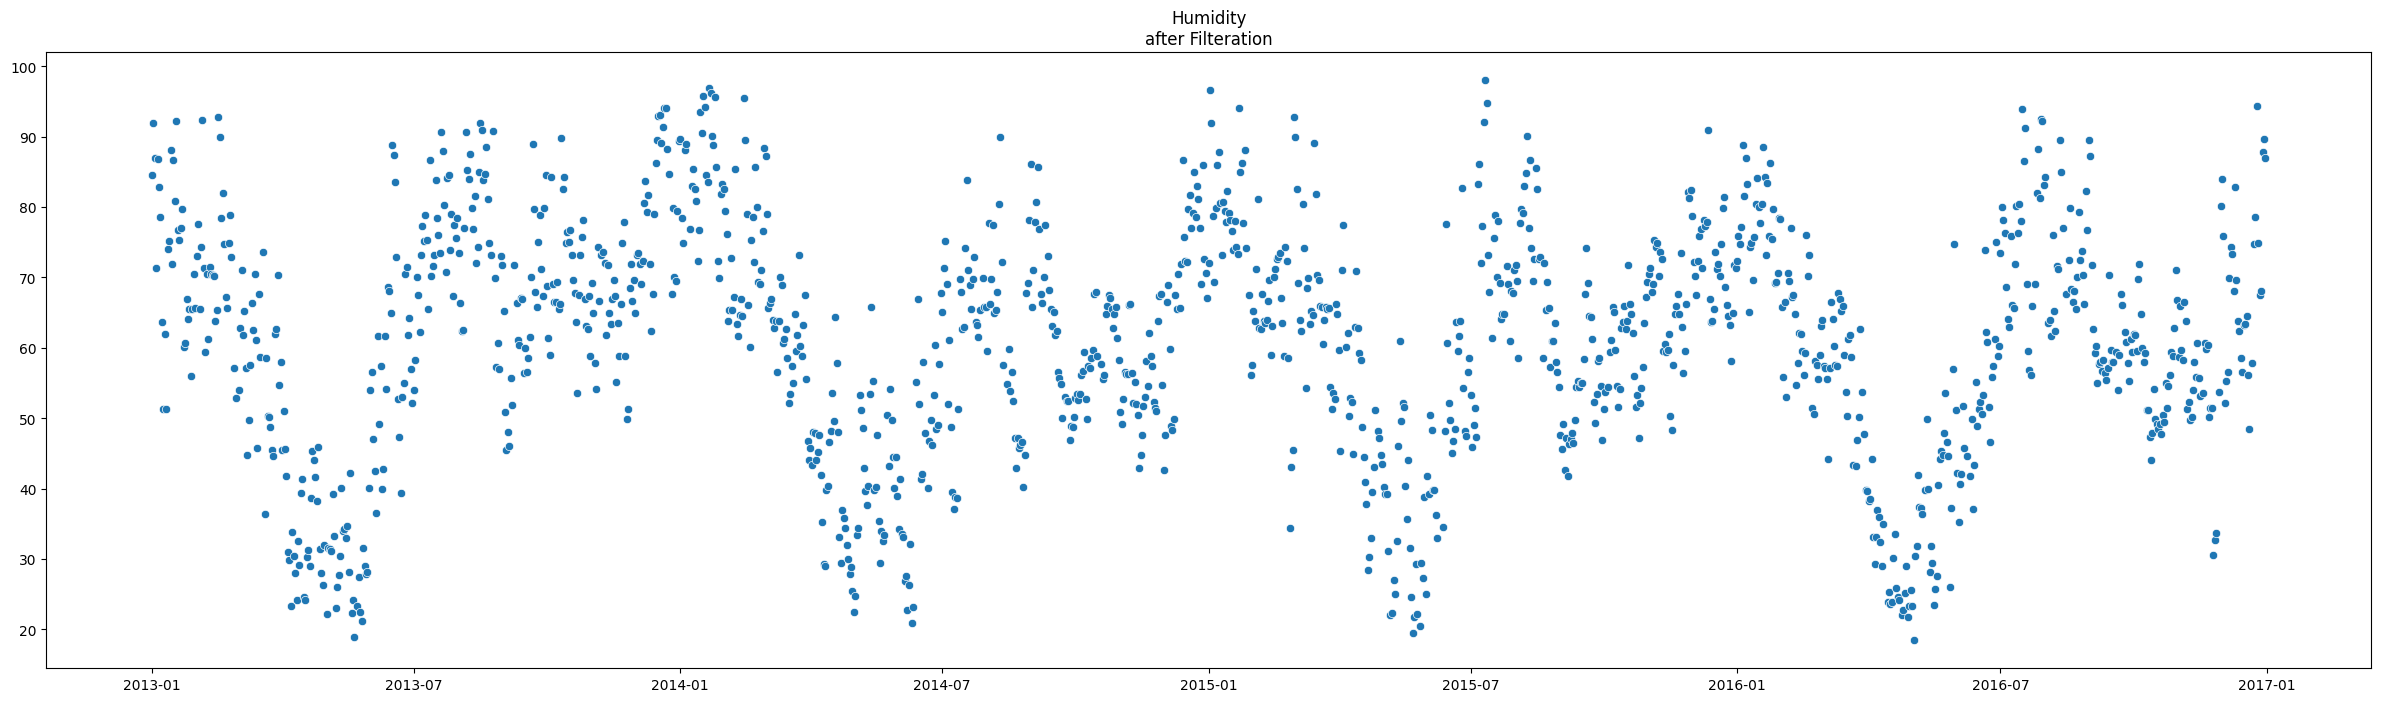

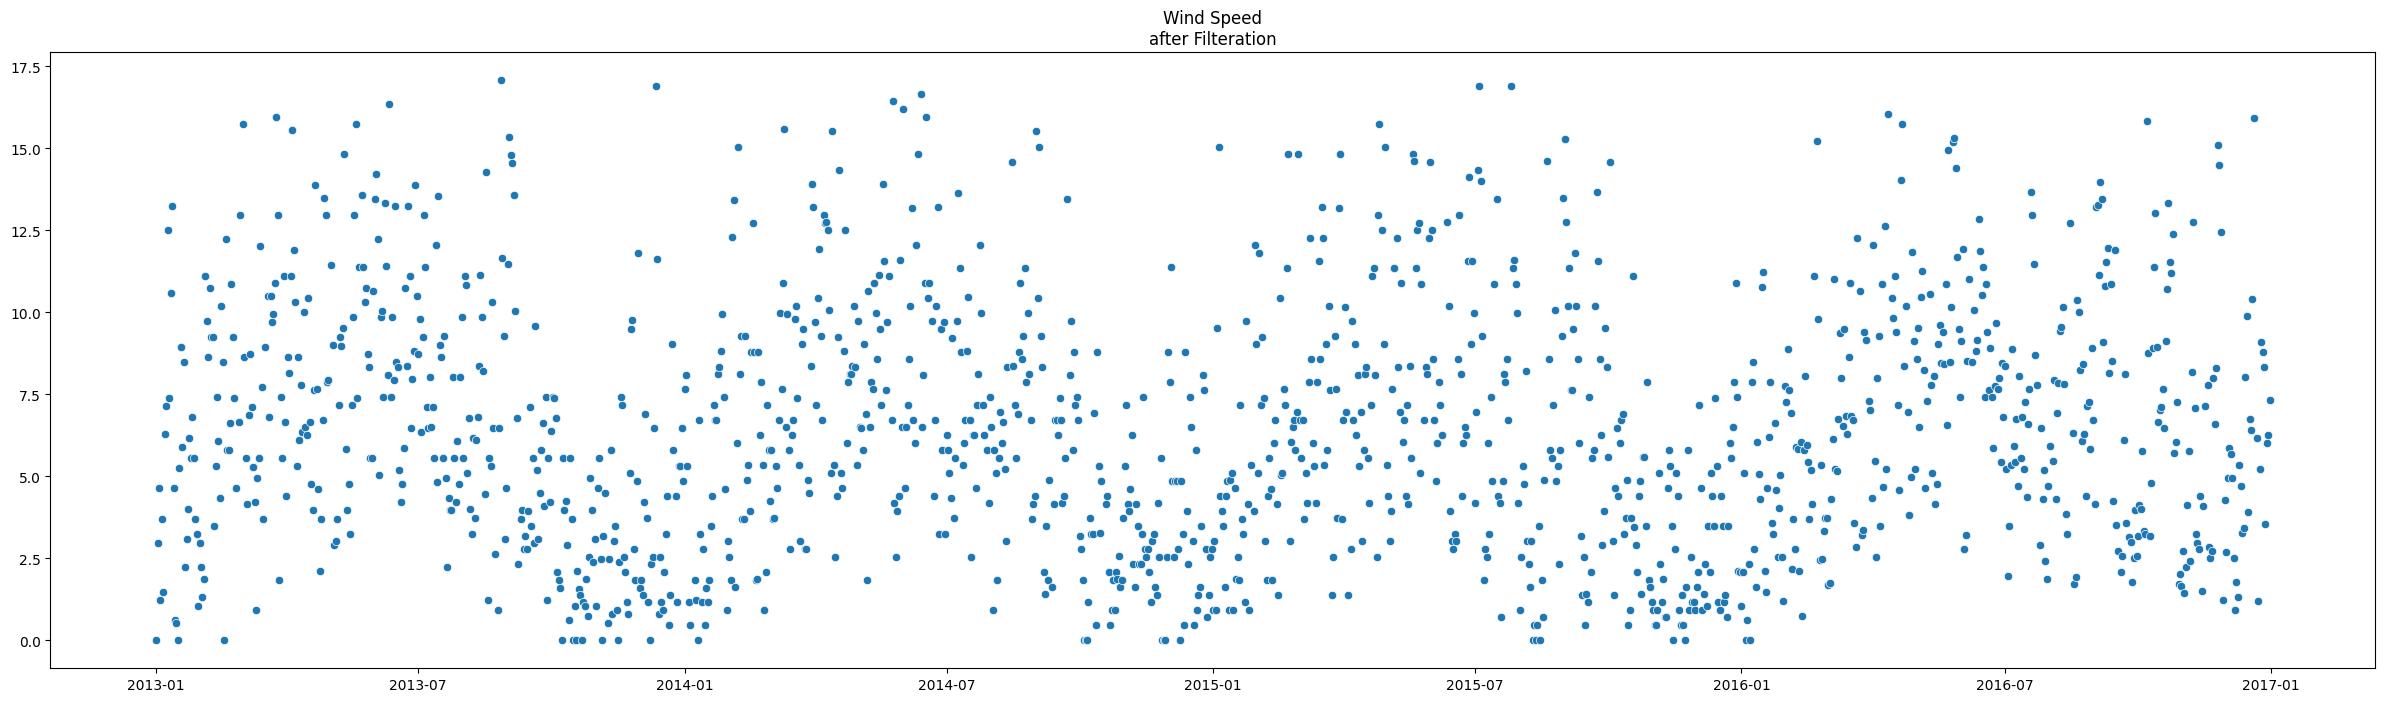

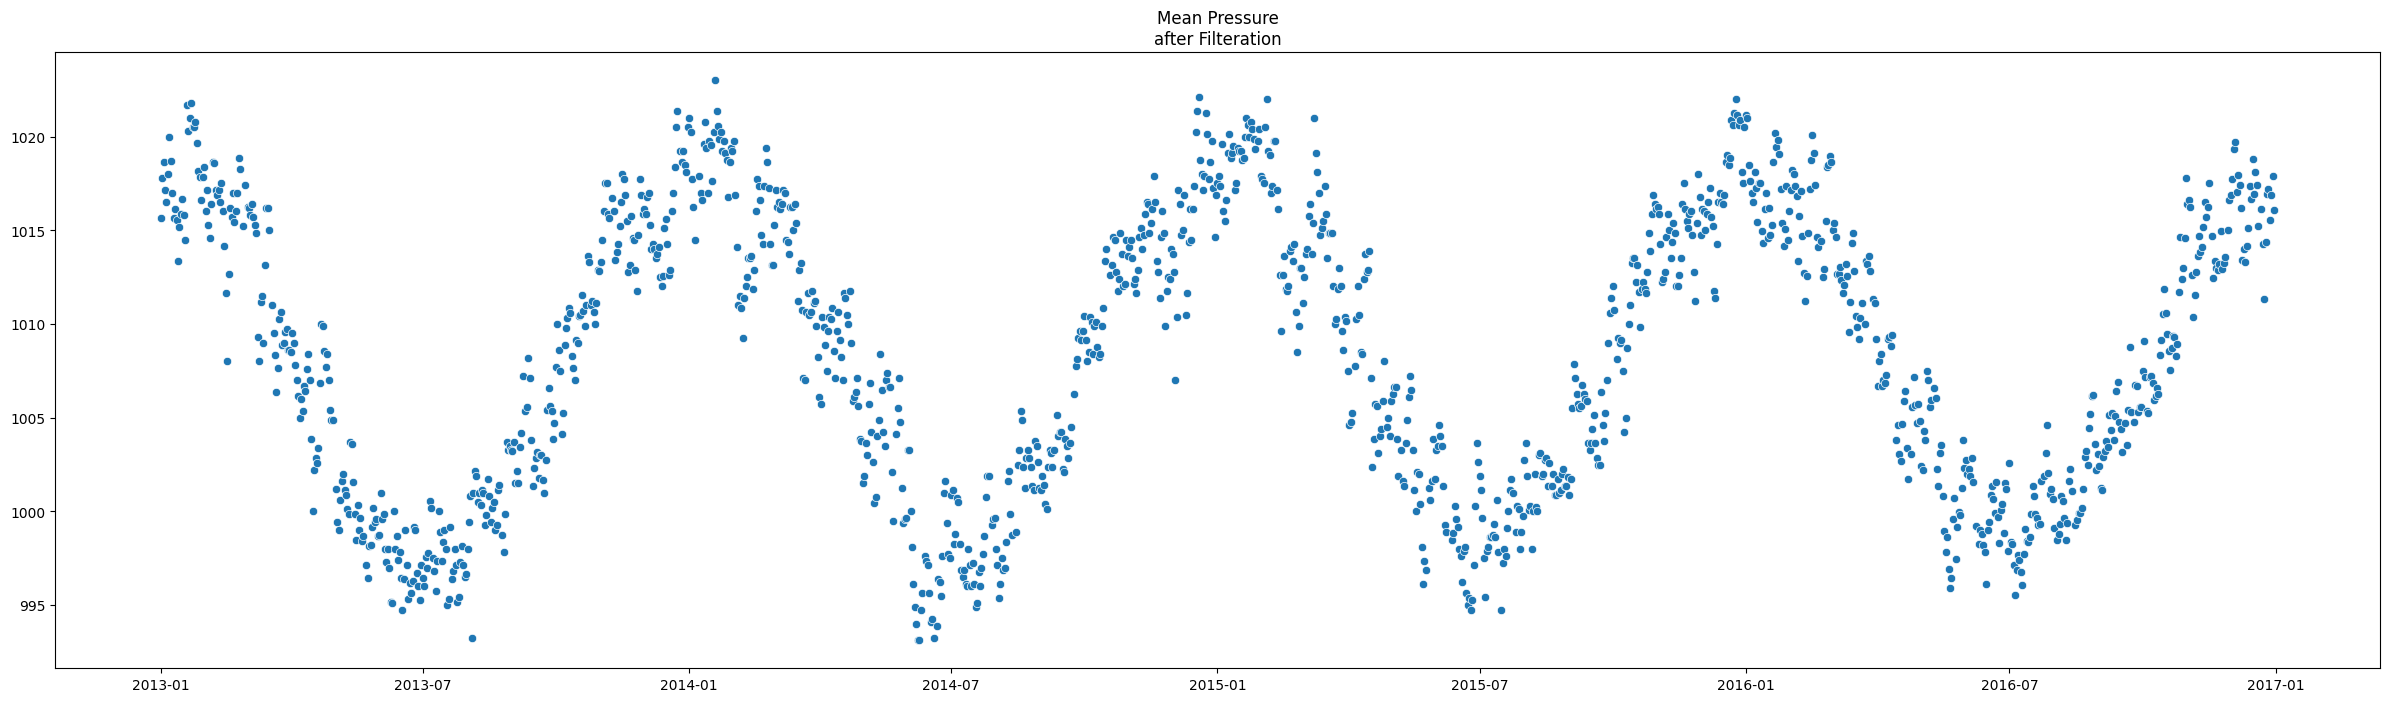

In [ ]:
showAllTimeSeries(df,0)

In [ ]:
print("Summary of the Weather: ")
for i in range(len(names)):
    print('# '+names[i])
    maxData = df[df[attributs[i]] == df[attributs[i]].max()]
    print(f'  + The Maximum {names[i]} is {maxData[attributs[i]].values[0]:<7.2f} \
in Year {maxData.index[0].year} Month {maxData.index[0].month}')

    minData=  df[df[attributs[i]] == df[attributs[i]].min()]
    print(f'  + The Minimum {names[i]} is {minData[attributs[i]].values[0]:<7.2f}\
 in Year {minData.index[0].year} month {minData.index[0].month}')


Summary of the Weather: 
# Mean Temperature
  + The Maximum Mean Temperature is 38.71   in Year 2013 Month 5
  + The Minimum Mean Temperature is 6.00    in Year 2013 month 1
# Humidity
  + The Maximum Humidity is 98.00   in Year 2015 Month 7
  + The Minimum Humidity is 18.47   in Year 2016 month 5
# Wind Speed
  + The Maximum Wind Speed is 17.07   in Year 2013 Month 8
  + The Minimum Wind Speed is 0.00    in Year 2013 month 1
# Mean Pressure
  + The Maximum Mean Pressure is 1023.00 in Year 2014 Month 1
  + The Minimum Mean Pressure is 993.12  in Year 2014 month 6


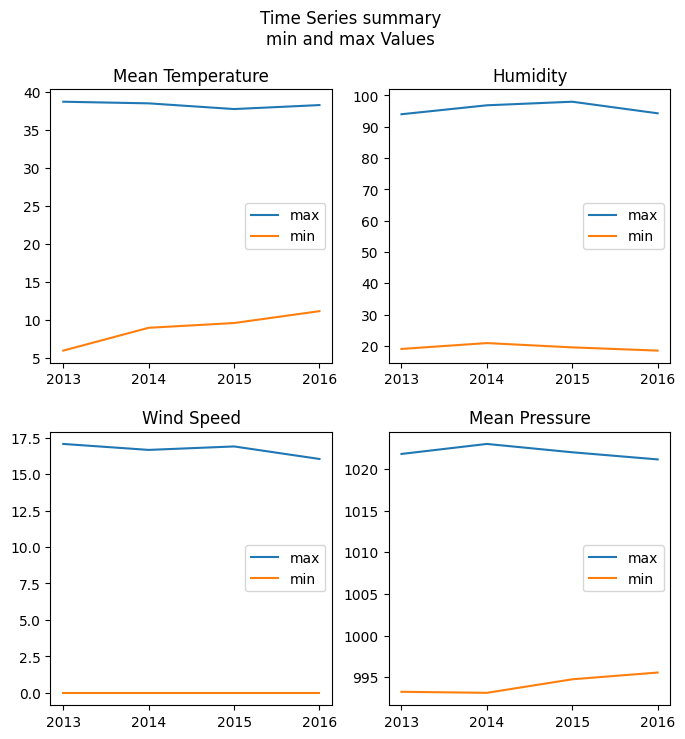

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(8,8))
fig.suptitle("Time Series summary\nmin and max Values")
fig.subplots_adjust(wspace=.2, hspace=.25)

idx = 0
for atr, ax in zip(attributs, axs.ravel()):
    ndf = df.groupby(df.index.year)[atr].describe()[['max', 'min']].plot(ax=ax)
    ax.set_title(names[idx])
    ax.set_xlabel("")
    idx+=1

plt.show()


Forcasting Model

In [ ]:
#checking stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues
johan_test_temp = df
coint_johansen(johan_test_temp,-1,1).eig

array([2.10637395e-01, 6.46706282e-02, 9.88534814e-03, 1.02731357e-11])

In [ ]:
#creating the train and validation set
train = df[:int(0.8*(len(df)))]
valid = df[int(0.8*(len(df))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.endog, steps=len(valid))
prediction

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


array([[  23.62868603,   63.58019317,    5.43876073, 1012.03843631],
       [  23.55694162,   63.17396625,    5.5912594 , 1011.76318392],
       [  23.4990014 ,   62.8835071 ,    5.6864904 , 1011.52606623],
       ...,
       [  24.93840272,   61.69490359,    6.24176069, 1008.37523838],
       [  24.93863491,   61.69474374,    6.24180206, 1008.37498826],
       [  24.93886291,   61.69458677,    6.24184269, 1008.37474265]])

In [ ]:
import math
from sklearn import metrics

In [ ]:
#converting predictions to dataframe
cols = df.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,4):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', math.sqrt(metrics.mean_squared_error(pred[i], valid[i])))

rmse value for meantemp is :  7.353904391681175
rmse value for humidity is :  17.607982825994164
rmse value for wind_speed is :  3.664334754701566
rmse value for meanpressure is :  6.712032457875671


In [ ]:
#make final predictions
model = VAR(endog=df)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.endog, steps=2)
print(yhat)

[[  15.38168561   84.25387559    5.43914224 1016.06599678]
 [  15.72434029   81.77625935    4.70967495 1016.05140588]]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
